In [3]:
#Try to predict wine quality from every feature
#Do it the train test split way
# 10 train test splits
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("wine-data.csv").dropna()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
data["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
data["type"] = data["type"].apply(lambda x: 1 if x == "red" else 0)

In [6]:
#Train on every feature except for type
x = np.array(data.drop("quality", axis=1))


In [7]:
y = data["quality"]
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [8]:
#Normalize the data with scaler
s = MinMaxScaler()

#fit and transform in one step
x_scaled = s.fit_transform(x)
x_scaled

array([[0.29752066, 0.41333333, 0.        , ..., 0.19101124, 0.20289855,
        1.        ],
       [0.33057851, 0.53333333, 0.        , ..., 0.25842697, 0.26086957,
        1.        ],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.24157303, 0.26086957,
        1.        ],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.13483146, 0.20289855,
        0.        ],
       [0.14049587, 0.14      , 0.18072289, ..., 0.08988764, 0.69565217,
        0.        ],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.05617978, 0.55072464,
        0.        ]])

In [9]:
#Train with 10 splits and aggregate accuracies
accs = []
model = ANN(max_iter = 1000)
for i in range(10):
    xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y)
    model.fit(xtrain, ytrain)
    ypredict = model.predict(xtest)
    accuracy = accuracy_score(ytest, ypredict)
    accs.append(accuracy)


In [10]:
#Take a look at the average accuracy.
np.mean(accs)

0.5648615384615384

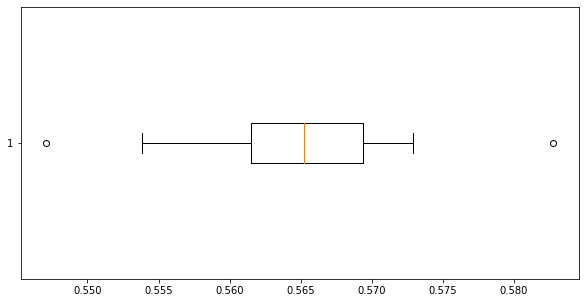

In [11]:
_ = plt.boxplot(accs, vert=False)
plt.gcf().set_size_inches(10,5)

In [14]:
# Generate a confusion matrix from a single train/test split
from sklearn.metrics import confusion_matrix
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y)
model.fit(xtrain, ytrain)
ypredict = model.predict(xtest)


In [16]:
confusion_matrix(ytest, ypredict)

array([[  1,   1,   2,   3,   0,   0],
       [  0,   3,  20,  16,   0,   0],
       [  2,   1, 332, 205,   3,   0],
       [  0,   1, 150, 519,  65,   0],
       [  0,   0,   8, 167,  80,   0],
       [  0,   0,   1,  26,  19,   0]], dtype=int64)